In [1]:
import pandas as pd
import numpy as np

train = pd.read_csv("./titanic/train.csv")
test = pd.read_csv("./titanic/test.csv")

pd.set_option("display.max_rows", None)

In [2]:
print("\033[1m" + "\033[41m" + "train.csv:" + "\033[0m")
train.head()

train.csv:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print("\033[1m" + "\033[41m" + "test.csv:" + "\033[0m")
test.head()

test.csv:


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
print("\033[1m" + "train.shape: " + "\033[0m", train.shape)
print("\033[1m" + "test.shape: " + "\033[0m", test.shape)

train.shape:  (891, 12)
test.shape:  (418, 11)


In [5]:
print("\033[1m" + "\033[42m" + "train.describe:" + "\033[0m")
train.describe()

train.describe:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
print("\033[1m" + "\033[42m" + "test.describe:" + "\033[0m")
test.describe()

test.describe:


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
def missing_table(df): 
    null_val = df.isnull().sum()
    percent = 100 * df.isnull().sum() / len(df)
    missing_table = pd.concat([null_val, percent], axis = 1)
    missing_table_ren_columns = missing_table.rename(columns = {0: "欠損数", 1: "%"})
    return missing_table_ren_columns

In [8]:
print("\033[1m" + "\033[43m" + "missing_table(train):" + "\033[0m")
missing_table(train)

missing_table(train):


,欠損数,%
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


In [9]:
print("\033[1m" + "\033[43m" + "missing_table(test):" + "\033[0m")
missing_table(test)

missing_table(test):


,欠損数,%
PassengerId,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,86,20.574163
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,1,0.239234
Cabin,327,78.229665


In [10]:
import math

train["Age"] = train["Age"].fillna(train["Age"].median())
train["Embarked"] = train["Embarked"].fillna("S")

train["Sex"][train["Sex"] == "male"] = 0
train["Sex"][train["Sex"] == "female"] = 1
train["Embarked"][train["Embarked"] == "S" ] = 0
train["Embarked"][train["Embarked"] == "C" ] = 1
train["Embarked"][train["Embarked"] == "Q"] = 2

# train 試験的に追加 Cabinの処理
tmp_cabin = []
for i in train.loc[:, "Cabin"]:
    tmp_list = []
    if type(i) != float:
        tmp_list = i.split(" ")
        for j, v in enumerate(tmp_list):
            if len(str(v)) == 1:
                tmp_list[j] = 0
            else:
                tmp_list[j] = int(v[1:])
                
        # 複数部屋番号がある場合、部屋が近い様なので平均値で統一
        tmp_cabin.append(int(np.mean(tmp_list)))
    else:
        tmp_cabin.append(0)
    
for i, v in enumerate(train["Cabin"]):
    train.loc[i, "Cabin"] = tmp_cabin[i]

C:\Users\work\AppData\Local\Temp/ipykernel_2068/2905950890.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["Sex"][train["Sex"] == "male"] = 0
C:\Users\work\AppData\Local\Temp/ipykernel_2068/2905950890.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["Sex"][train["Sex"] == "female"] = 1
C:\Users\work\AppData\Local\Temp/ipykernel_2068/2905950890.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["Embarked"][trai

In [11]:
test["Age"] = test["Age"].fillna(test["Age"].median())

test["Sex"][test["Sex"] == "male"] = 0
test["Sex"][test["Sex"] == "female"] = 1
test["Embarked"][test["Embarked"] == "S"] = 0
test["Embarked"][test["Embarked"] == "C"] = 1
test["Embarked"][test["Embarked"] == "Q"] = 2

test.Fare[152] = test.Fare.median()

# test 試験的に追加 Cabinの処理
tmp_cabin = []
for i in test.loc[:, "Cabin"]:
    tmp_list = []
    if type(i) != float:
        tmp_list = i.split(" ")
        for j, v in enumerate(tmp_list):
            if len(str(v)) == 1:
                tmp_list[j] = 0
            else:
                tmp_list[j] = int(v[1:])
                
        # 複数部屋番号がある場合、部屋が近い様なので平均値で統一
        tmp_cabin.append(int(np.mean(tmp_list)))
    else:
        tmp_cabin.append(0)
    
for i, v in enumerate(test["Cabin"]):
    test.loc[i, "Cabin"] = tmp_cabin[i]

C:\Users\work\AppData\Local\Temp/ipykernel_2068/1801697685.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Sex"][test["Sex"] == "male"] = 0
C:\Users\work\AppData\Local\Temp/ipykernel_2068/1801697685.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Sex"][test["Sex"] == "female"] = 1
C:\Users\work\AppData\Local\Temp/ipykernel_2068/1801697685.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Embarked"][test["Emb

In [12]:
print("\033[1m" + "\033[45m" + "train 加工後:" + "\033[0m")
train.head()

train 加工後:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,0


In [13]:
missing_table(train)

,欠損数,%
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
Age,0,0.0
SibSp,0,0.0
Parch,0,0.0
Ticket,0,0.0
Fare,0,0.0


In [14]:
print("\033[1m" + "\033[45m" + "test 加工後:" + "\033[0m")
test.head()

test 加工後:


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,0,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,0,2
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0,0


In [15]:
missing_table(test)

,欠損数,%
PassengerId,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
Age,0,0.0
SibSp,0,0.0
Parch,0,0.0
Ticket,0,0.0
Fare,0,0.0
Cabin,0,0.0


train histogram:


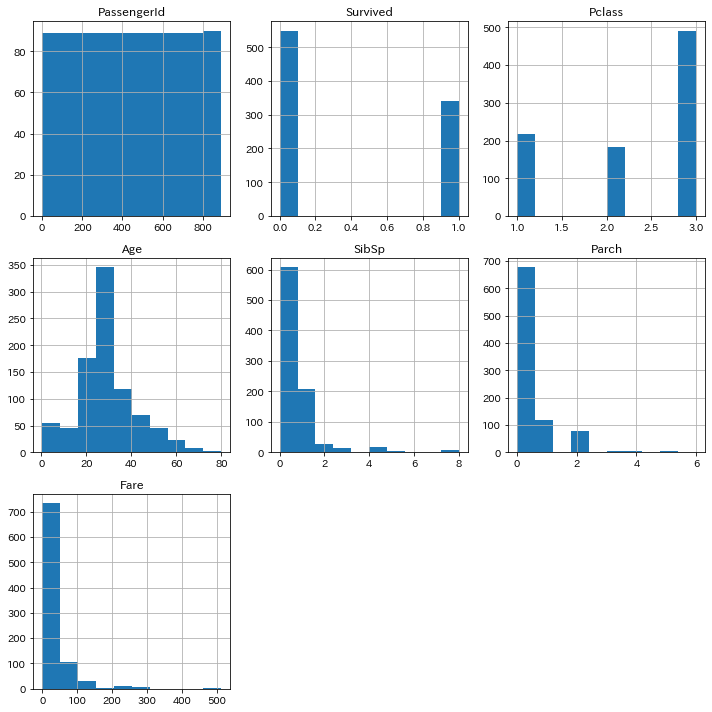

In [16]:
import matplotlib.pyplot as plt
from pylab import rcParams

print("\033[1m" + "\033[45m" + "train histogram:" + "\033[0m")

rcParams['figure.figsize'] = 10, 10
train.hist()
plt.tight_layout()
plt.show()

test histogram:


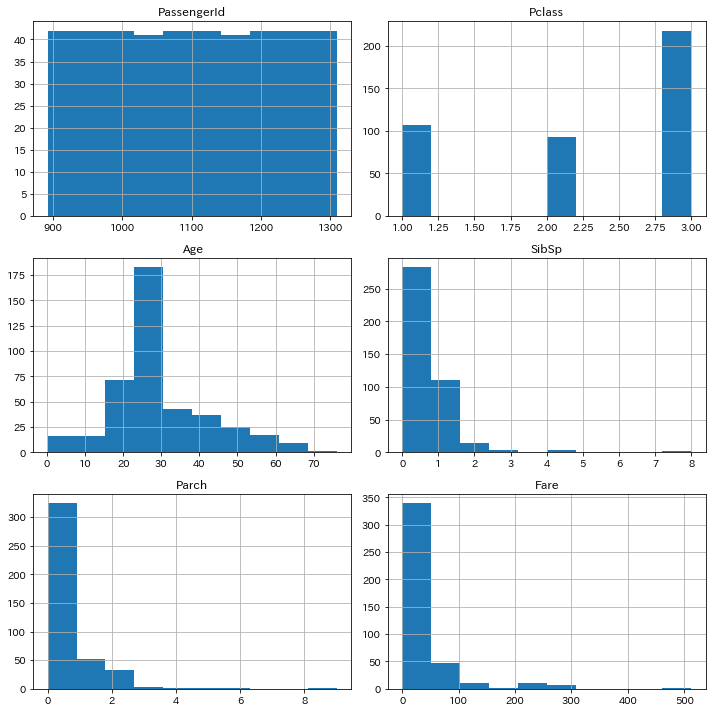

In [17]:
print("\033[1m" + "\033[46m" + "test histogram:" + "\033[0m")

test.hist()
plt.tight_layout()
plt.show()

In [ ]:
# 今の所決定木の方が高いので未使用

from sklearn.ensemble import RandomForestClassifier

target = train["Survived"].values
features = train[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]].values
#features = train[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Cabin", "Embarked"]].values
test_features = test[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]].values
#test_features = test[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Cabin", "Embarked"]].values

rfc = RandomForestClassifier(
    n_estimators = 100,
    max_depth = 10)
rfc.fit(features, target)

my_prediction = rfc.predict(test_features)

In [ ]:
# 今の所決定木の方が高いので未使用

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

target = train["Survived"].values
features = train[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]].values
test_features = test[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]].values

param = {
    "n_estimators": [1, 50, 100, 200, 300, 500],
    "max_depth"   : [1, 10, 50, 100, 200, 300],
    "max_features": ["sqrt", "log2", None]
}

#grid_search = GridSearchCV(RandomForestClassifier(random_state = 123), param, cv = 2, verbose = 3, n_jobs = -1, refit = True)

grid_search = GridSearchCV(
    RandomForestClassifier(random_state = 123), param, cv = 5, n_jobs = -1, refit = True
)

grid_search.fit(features, target)
my_prediction = grid_search.predict(test_features)

In [18]:
# 現在使用中
# csv16

from sklearn.model_selection import GridSearchCV
from sklearn import tree

target = train["Survived"].values

#features = train[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Cabin", "Embarked"]].values
features = train[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]].values

#features = train[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]].values
#features = train[["Sex", "Age", "SibSp", "Parch"]].values

#test_features = test[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Cabin", "Embarked"]].values
test_features = test[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]].values

#test_features = test[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]].values
#test_features = test[["Sex", "Age", "SibSp", "Parch"]].values

param = {
    'max_depth': [1, 2, 3, 4, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30],
    'min_samples_split': [2, 3, 4, 5, 10],
}

#grid_search = GridSearchCV(tree.DecisionTreeClassifier(random_state = 123), param, cv = 5, verbose = 3, n_jobs = -1, refit = True)

grid_search = GridSearchCV(
    tree.DecisionTreeClassifier(random_state = 123), param, cv = 5, n_jobs = -1, refit = True
)

grid_search.fit(features, target)
my_prediction = grid_search.predict(test_features)

In [19]:
print("\033[1m" + "my_prediction.shape: " + "\033[0m", my_prediction.shape)

my_prediction.shape:  (418,)


In [20]:
print("\033[1m" + "\033[42m" + "my_prediction:" + "\033[0m")
print(my_prediction)

my_prediction:
[0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 0 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 0 1 0 0 1 0 0 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 1 1 1 1 1 1 0 1 0 0 1]


In [21]:
PassengerId = np.array(test["PassengerId"]).astype(int)
my_solution_tree = pd.DataFrame(my_prediction, PassengerId, columns = ["Survived"])
my_solution_tree.to_csv("my_tree.csv", index_label = ["PassengerId"])

In [ ]:
 1: 0.75358 tree
 2: 0.74401 RandomForestClassifier & GridSearchCV
 3: 0.74880 RandomForestClassifier & GridSearchCV Cabin追加後
 4: 0.74880 tree Cabin追加後
 5: 0.75598 tree やっぱCabin抜き
 6: 0.77990 tree & GridSearchCV やっぱCabin抜き
 7: 0.74641 RandomForestClassifierのみ Cabin抜き
 8: 0.76076 RandomForestClassifierのみ n_estimators = 100, max_depth = 10
 9: 0.75598 RandomForestClassifierのみ n_estimators = 300, max_depth = 50
10: 0.77033 RandomForestClassifierのみ n_estimators = 100, max_depth = 10
11: 0.77033 RandomForestClassifier & GridSearchCV 色々変更後
12: 0.77272 RandomForestClassifier & GridSearchCV CV = 5にしただけ
13: 0.77033 RandomForestClassifier パラメータ増やした
14: 0.77272 + CV = 5
15: 0.77990 再度 tree & GridSearchCV

現時点での最高記録:


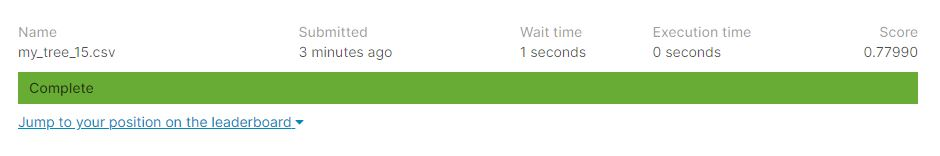

In [22]:
print("現時点での最高記録:")

from PIL import Image
Image.open("./csv_15.JPG")